In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
#from xgboost import XGBRegressor
#from catboost import CatBoostRegressor

from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV


In [16]:
%pip install xgboost catboost


  Using cached xgboost-3.1.3-py3-none-win_amd64.whl.metadata (2.0 kB)
  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached plotly-6.5.2-py3-none-any.whl.metadata (8.5 kB)
  Using cached narwhals-2.15.0-py3-none-any.whl.metadata (13 kB)
Using cached xgboost-3.1.3-py3-none-win_amd64.whl (72.0 MB)
   ---------------------------------------- 0.0/102.5 MB ? eta -:--:--
    --------------------------------------- 1.3/102.5 MB 7.5 MB/s eta 0:00:14
   - -------------------------------------- 4.2/102.5 MB 8.7 MB/s eta 0:00:12
   -- ------------------------------------- 5.2/102.5 MB 8.4 MB/s eta 0:00:12
   -- ------------------------------------- 6.8/102.5 MB 7.4 MB/s eta 0:00:13
   --- ------------------------------------ 8.1/102.5 MB 7.3 MB/s eta 0:00:13
   --- ------------------------------------ 9.4/102.5 MB 6.9 MB/s eta 0:00:14
   ---- ----------------------------------- 11.0/102.5 MB 7.0 MB/s eta 0:00:14
   ---- ----------------------------------- 12.1/102.5 MB 6.6

In [2]:
df=pd.read_csv('StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
X=df.drop(columns='math score', axis=1)

In [5]:
X.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88


In [6]:
y=df['math score']

In [7]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [8]:
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transformer=StandardScaler()
cat_transformer=OneHotEncoder()
preprocessor=ColumnTransformer(
    [
        ('OneHotEncoder', cat_transformer, cat_features),
        ('StandardScaler', num_transformer, num_features)
    ]
)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [10]:
X_train=preprocessor.fit_transform(X_train)

In [11]:
X_test=preprocessor.transform(X_test)

In [12]:
def evaluate_model(true, predicted):
    mae=mean_absolute_error(true, predicted)
    mse=mean_squared_error(true, predicted)
    r2=r2_score(true, predicted)
    return mae, mse, r2

In [14]:
models={
    'LR': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'KNeighborsRegressor': KNeighborsRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor()
}

model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train, y_train)


    y_train_pred=model.predict(X_train)
    y_test_pred=model.predict(X_test)

    model_train_mae, model_train_mse, model_train_r2=evaluate_model(y_train, y_train_pred)
    model_test_mae, model_test_mse, model_test_r2=evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('MODEL PERFORMANCE FOR TRAINING SET')
    print('- MEAN ABSOLUTE ERROR: {:.4f}'.format(model_train_mae))
    print('-MEAN SQUARED ERROR:{:.4f}'.format(model_train_mse))
    print('R2 SCORE: {:.4f}'.format(model_train_r2))

    print("------------------------------")


    print('MODEL PERFORMANCE FOR TESTING SET')
    print('- MEAN ABSOLUTE ERROR: {:.4f}'.format(model_test_mae))
    print('-MEAN SQUARED ERROR:{:.4f}'.format(model_test_mse))
    print('R2 SCORE: {:.4f}'.format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('/n')
    


LR
MODEL PERFORMANCE FOR TRAINING SET
- MEAN ABSOLUTE ERROR: 4.2667
-MEAN SQUARED ERROR:28.3349
R2 SCORE: 0.8743
------------------------------
MODEL PERFORMANCE FOR TESTING SET
- MEAN ABSOLUTE ERROR: 4.2148
-MEAN SQUARED ERROR:29.0952
R2 SCORE: 0.8804
/n
Lasso
MODEL PERFORMANCE FOR TRAINING SET
- MEAN ABSOLUTE ERROR: 5.2053
-MEAN SQUARED ERROR:43.4611
R2 SCORE: 0.8072
------------------------------
MODEL PERFORMANCE FOR TESTING SET
- MEAN ABSOLUTE ERROR: 5.1557
-MEAN SQUARED ERROR:42.4758
R2 SCORE: 0.8254
/n
Ridge
MODEL PERFORMANCE FOR TRAINING SET
- MEAN ABSOLUTE ERROR: 4.2650
-MEAN SQUARED ERROR:28.3377
R2 SCORE: 0.8743
------------------------------
MODEL PERFORMANCE FOR TESTING SET
- MEAN ABSOLUTE ERROR: 4.2111
-MEAN SQUARED ERROR:29.0566
R2 SCORE: 0.8806
/n
KNeighborsRegressor
MODEL PERFORMANCE FOR TRAINING SET
- MEAN ABSOLUTE ERROR: 4.5105
-MEAN SQUARED ERROR:32.5410
R2 SCORE: 0.8557
------------------------------
MODEL PERFORMANCE FOR TESTING SET
- MEAN ABSOLUTE ERROR: 5.5880
-

In [16]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name' , 'R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880592
0,LR,0.880433
5,RandomForestRegressor,0.847164
6,AdaBoostRegressor,0.846336
1,Lasso,0.825446
3,KNeighborsRegressor,0.785944
4,DecisionTreeRegressor,0.741964


In [23]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(X_train, y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test, y_pred)
print(f'ACCURACY OF THE MODEL IS {score:.2%}')

ACCURACY OF THE MODEL IS 88.04%


Text(0, 0.5, 'PREDICTED')

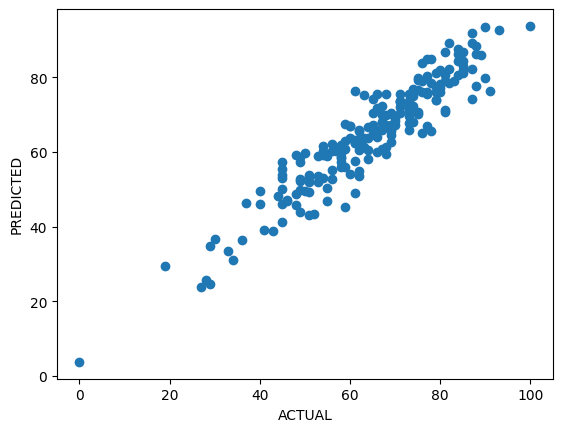

In [24]:
plt.scatter(y_test, y_pred)
plt.xlabel('ACTUAL')
plt.ylabel('PREDICTED')

<Axes: xlabel='math score'>

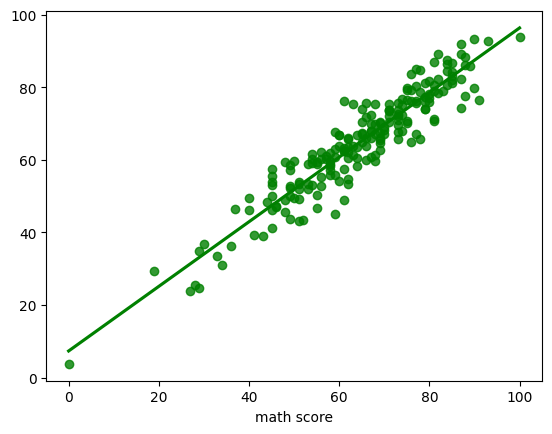

In [28]:
sns.regplot(x=y_test, y=y_pred, ci=None, color='green')

In [30]:
pred_df=pd.DataFrame({'Actural_value': y_test, 'Predicted_value': y_pred, 'Difference': y_test-y_pred})
pred_df

,Actural_value,Predicted_value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
